In [1]:
from scipy.stats import tukey_hsd, f_oneway
import pandas as pd

In [2]:
import matplotlib
from matplotlib.font_manager import fontManager
fontManager.findfont("Times New Roman")

'C:\\Windows\\Fonts\\times.ttf'

In [3]:
data_df = pd.read_csv('data/time_to_threshold_4_picknplace_data.csv', index_col=0)
data_df.head()

,DYNAMIC,STATIC,DDPG,LINRS,NRS
0,505,251,612,800,401
1,316,196,653,748,704
2,571,175,606,449,754
3,308,197,670,482,532
4,411,363,734,488,830


# T検定

In [4]:
from scipy.stats import ttest_rel

In [5]:
ttest_data_df = data_df[["STATIC", "LINRS"]].copy()

In [6]:
ttest_result = ttest_rel(*ttest_data_df.values.T.tolist())
ttest_result

Ttest_relResult(statistic=-4.255038352867175, pvalue=0.01310531204506057)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from vistats import annotate_brackets
from vistats.util import ttest_result2asterisk_tuples
import numpy as np

In [8]:
asterisk_tuples = ttest_result2asterisk_tuples(ttest_result)
print(asterisk_tuples)

[(0, 1, '*')]


Text(0.5, 0, 'method')

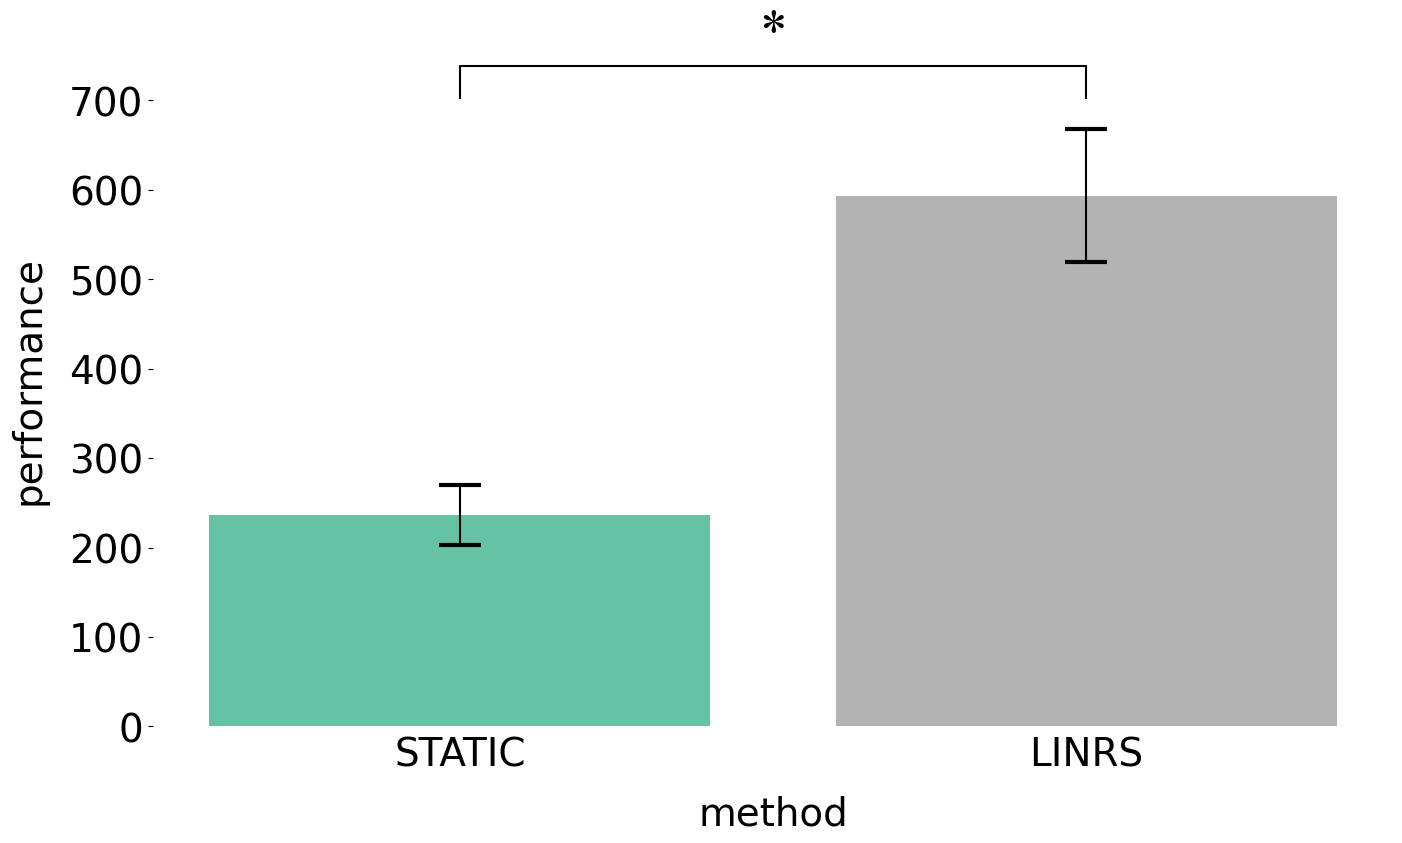

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))
cmap = sns.color_palette("Set2", as_cmap=True)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(bottom=False, labelsize=28)
plt.rcParams["font.family"] = "Times New Roman"

bars = np.arange(len(ttest_data_df.columns))
means = ttest_data_df.mean(axis=0)
sems = ttest_data_df.sem(axis=0)

plt.bar(
    bars, means,
    tick_label=ttest_data_df.columns.tolist(),
    yerr=sems,
    capsize=15.0,
    error_kw={"capthick": 3.0},
    align='center',
    color=cmap.resampled(len(ttest_data_df.columns)).colors
)

# run the function after plt.bar
annotate_brackets(
    asterisk_tuples, bars, means.tolist(), 
    yerr=sems.tolist(), fs=40, ax=ax
)

plt.ylabel("performance", labelpad=15, fontsize=28)
plt.xlabel("method", labelpad=15, fontsize=28)

Text(0.5, 0, 'method')

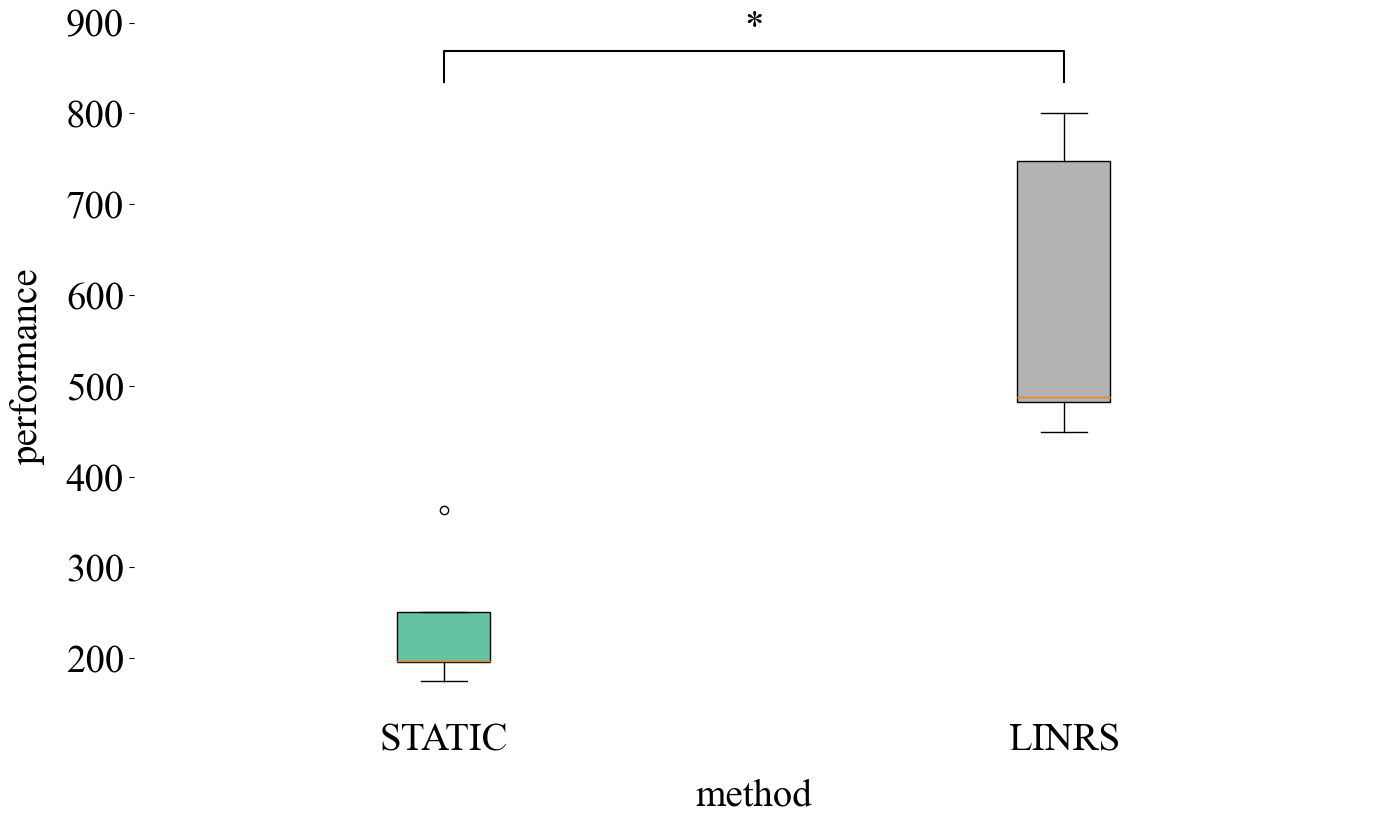

In [10]:
from scipy import stats
from matplotlib import cbook
from vistats import boxplot_annotate_brackets
fig, ax = plt.subplots(figsize=(16, 9))
cmap = sns.color_palette("Set2", as_cmap=True)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(bottom=False, labelsize=28)
plt.rcParams["font.family"] = "Times New Roman"
bplot = plt.boxplot(ttest_data_df.values, labels=ttest_data_df.columns.tolist(), patch_artist=True)
boxplot_annotate_brackets(asterisk_tuples, ttest_data_df.values, fs=28)

for box, sample_cmap in zip(bplot['boxes'], cmap.resampled(len(bplot['boxes'])).colors):
    box.set_facecolor(sample_cmap)

plt.ylabel("performance", labelpad=15, fontsize=28)
plt.xlabel("method", labelpad=15, fontsize=28)

# ANOVAと多重比較

In [11]:
result = f_oneway(*data_df.values.T.tolist())
print(result)

F_onewayResult(statistic=10.037079093822024, pvalue=0.00012680522359504427)


In [12]:
result = tukey_hsd(*data_df.values.T.tolist())
print(result)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    185.800     0.179   -53.666   425.266
 (0 - 2)   -232.800     0.059  -472.266     6.666
 (0 - 3)   -171.200     0.243  -410.666    68.266
 (0 - 4)   -222.000     0.077  -461.466    17.466
 (1 - 0)   -185.800     0.179  -425.266    53.666
 (1 - 2)   -418.600     0.000  -658.066  -179.134
 (1 - 3)   -357.000     0.002  -596.466  -117.534
 (1 - 4)   -407.800     0.000  -647.266  -168.334
 (2 - 0)    232.800     0.059    -6.666   472.266
 (2 - 1)    418.600     0.000   179.134   658.066
 (2 - 3)     61.600     0.936  -177.866   301.066
 (2 - 4)     10.800     1.000  -228.666   250.266
 (3 - 0)    171.200     0.243   -68.266   410.666
 (3 - 1)    357.000     0.002   117.534   596.466
 (3 - 2)    -61.600     0.936  -301.066   177.866
 (3 - 4)    -50.800     0.968  -290.266   188.666
 (4 - 0)    222.000     0.077   -17.466   461.466
 (4 - 1)    407.800     0.000   

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from vistats import annotate_brackets
from vistats.util import tukeyhsd_result2asterisk_tuples
import numpy as np

In [14]:
asterisk_tuples = tukeyhsd_result2asterisk_tuples(result)
print(asterisk_tuples)

[(1, 2, '**'), (1, 3, '**'), (1, 4, '**')]


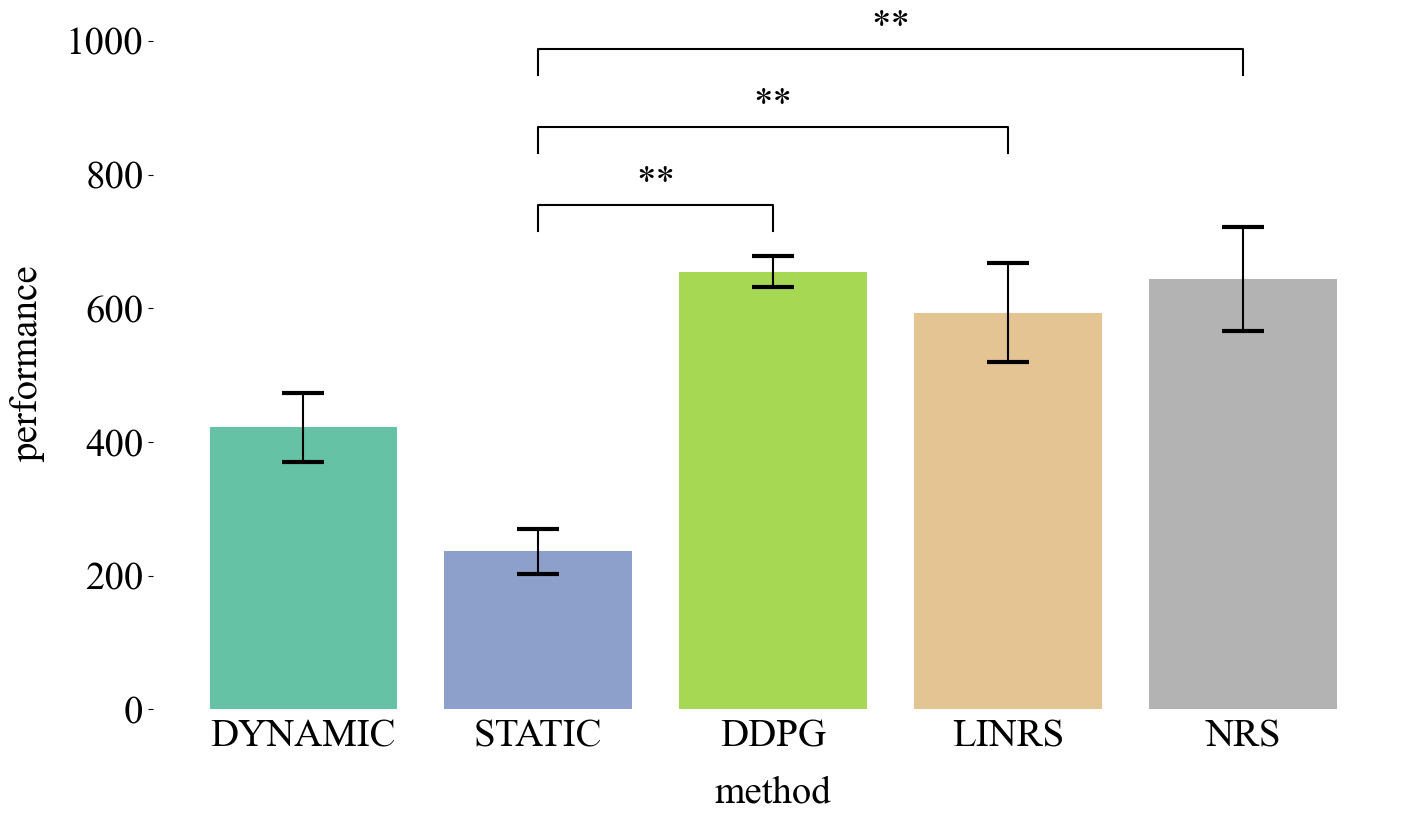

In [15]:
fig, ax = plt.subplots(figsize=(16, 9))
cmap = sns.color_palette("Set2", as_cmap=True)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(bottom=False, labelsize=28)

bars = np.arange(len(data_df.columns))
means = data_df.mean(axis=0)
sems = data_df.sem(axis=0)

ax.bar(
    bars, means,
    tick_label=data_df.columns.tolist(),
    yerr=sems,
    capsize=15.0,
    error_kw={"capthick": 3.0},
    align='center',
    color=cmap.resampled(len(data_df.columns)).colors
)

# run the function after plt.bar
annotate_brackets(
    asterisk_tuples, bars, means.tolist(), 
    yerr=sems.tolist(), fs=28, ax=ax
)

ax.set_ylabel("performance", labelpad=15, fontsize=28)
ax.set_xlabel("method", labelpad=15, fontsize=28)
plt.savefig('./out/multiple_comparison_barplot')

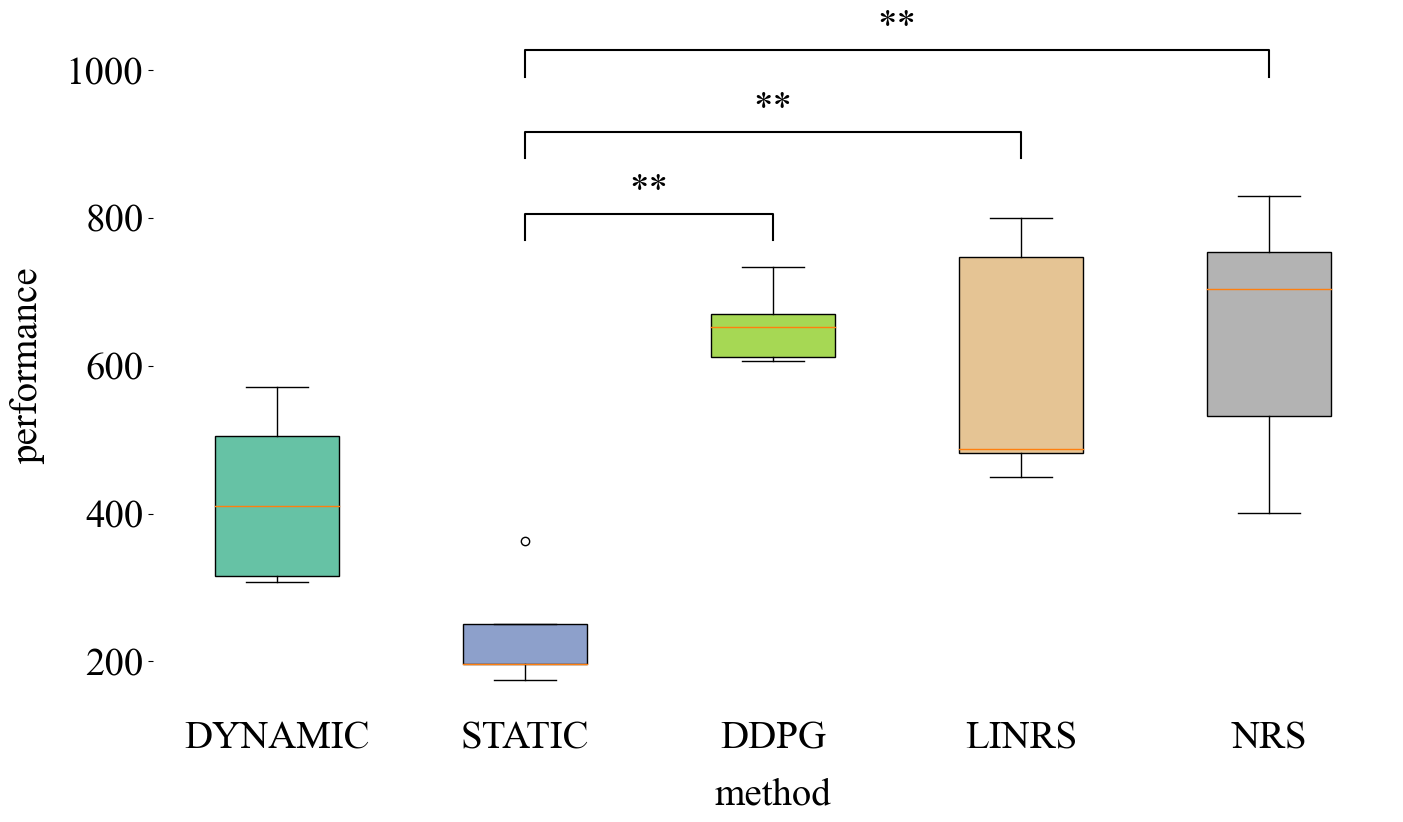

In [16]:
from scipy import stats
from matplotlib import cbook
from vistats import boxplot_annotate_brackets
fig, ax = plt.subplots(figsize=(16, 9))
cmap = sns.color_palette("Set2", as_cmap=True)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(bottom=False, labelsize=28)
plt.rcParams["font.family"] = "Times New Roman"
bplot = plt.boxplot(data_df.values, labels=data_df.columns.tolist(), patch_artist=True)
boxplot_annotate_brackets(asterisk_tuples, data_df.values, fs=28)

for box, sample_cmap in zip(bplot['boxes'], cmap.resampled(len(bplot['boxes'])).colors):
    box.set_facecolor(sample_cmap)

plt.ylabel("performance", labelpad=15, fontsize=28)
plt.xlabel("method", labelpad=15, fontsize=28)
plt.savefig('./out/multiple_comparison_boxplot')